In [87]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [88]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [89]:
file_name = "poems_with_new_tags.zip"
poem_df = pd.read_csv('poems_with_new_tags.zip', compression='zip', header=0, quotechar='"')


In [90]:
#'写物', '劝勉', '家庭', '快乐', '悲苦', '政治', '朋友', '游玩'
poems_info = poem_df.drop(['star','author_stars','tags','tags_list','new_tags','new_first_tag'], axis=1)
poems_info.rename(columns={'写物': 'object_', '劝勉': 'encourage_', '家庭':'family_', '快乐':'happiness_',\
          '悲苦': 'sadness_', '政治': 'policy_', '朋友': 'friend_', '游玩': 'travel_'}, inplace=True)


In [91]:
poems_info.head()

,content,dynasty,author,title,object_,encourage_,family_,happiness_,sadness_,policy_,friend_,travel_
0,《吴都赋》云：“户藏烟浦，家具画船。”唯吴兴为然。春游之盛，西湖未能过也。己酉岁，予与萧时父...,宋代,姜夔,琵琶仙·《吴都赋》云：「户藏烟浦,0,0,0,0,0,1,0,1
1,《廿一史弹词》第三段说秦汉开场词滚滚长江东逝水，浪花淘尽英雄。是非成败转头空。青山依旧在，几...,明代,杨慎,临江仙·滚滚长江东逝水,1,1,0,0,1,1,0,0
2,《水经》云：“彭蠡之口有石钟山焉。”郦元以为下临深潭，微风鼓浪，水石相搏，声如洪钟。是说也，...,宋代,苏轼,石钟山记,1,0,0,0,0,1,0,1
3,【序】辛亥之冬，予载雪诣石湖。止既月，授简索句，且征新声，作此两曲。石湖把玩不已，使工妓隶习...,宋代,姜夔,暗香疏影,0,1,0,0,0,0,0,0
4,〔一枝花〕 攀出墙朵朵花，折临路枝枝柳。花攀红蕊嫩，柳折翠条柔，浪子风流。凭着我折柳攀花手...,元代,关汉卿,【南吕】一枝花不伏老,1,0,0,1,1,0,0,0


In [92]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = poems_info.iloc[:,4:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(poems_info))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(poems_info)-clean_comments_count))

Total number of comments =  6107
Number of clean comments =  4
Number of comments with labels = 6103


In [93]:
labels = list(poems_info.columns.values)
labels = labels[4:]
print(labels)

['object_', 'encourage_', 'family_', 'happiness_', 'sadness_', 'policy_', 'friend_', 'travel_']


In [94]:
# Calculating number of comments in each category

counts = []
for label in labels:
    counts.append((label, poems_info[label].sum()))
df_stats = pd.DataFrame(counts, columns=['label', 'number of poems'])
df_stats

,label,number of poems
0,object_,2573
1,encourage_,1362
2,family_,596
3,happiness_,827
4,sadness_,2776
5,policy_,3345
6,friend_,1292
7,travel_,1190


/home/lindayang16/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


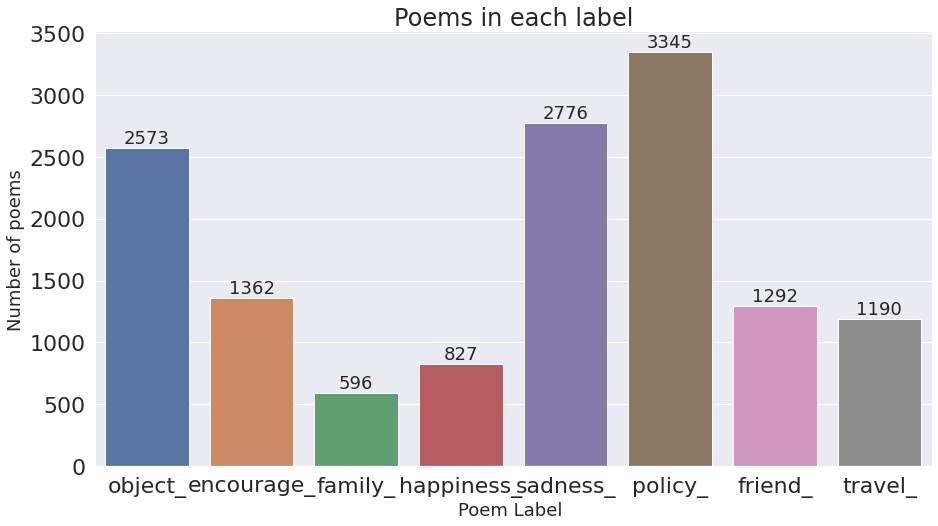

In [95]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(labels, poems_info.iloc[:,4:].sum().values)

plt.title("Poems in each label", fontsize=24)
plt.ylabel('Number of poems', fontsize=18)
plt.xlabel('Poem Label ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = poems_info.iloc[:,4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

/home/lindayang16/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


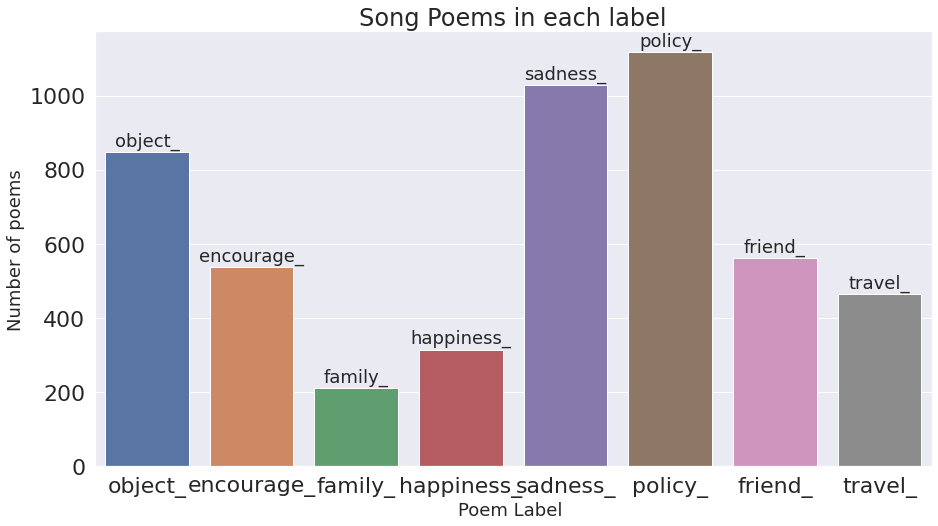

In [104]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
song_poems_info = poems_info[poems_info.dynasty=='宋代']
song_labels = list(song_poems_info.columns.values)[4:]

ax= sns.barplot(song_labels, song_poems_info.iloc[:,4:].sum().values)

plt.title("Song Poems in each label", fontsize=24)
plt.ylabel('Number of poems', fontsize=18)
plt.xlabel('Poem Label ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = song_poems_info.iloc[:,4:].sum().values
for rect, label in zip(rects, song_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

/home/lindayang16/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


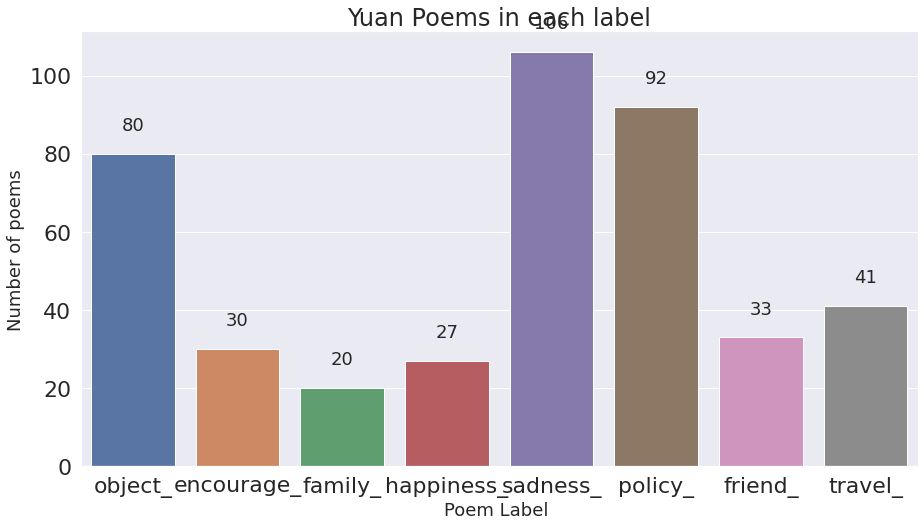

In [106]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
yuan_poems_info = poems_info[poems_info.dynasty=='元代']
yuan_labels = list(yuan_poems_info.columns.values)[4:]

ax= sns.barplot(yuan_labels, yuan_poems_info.iloc[:,4:].sum().values)

plt.title("Yuan Poems in each label", fontsize=24)
plt.ylabel('Number of poems', fontsize=18)
plt.xlabel('Poem Label ', fontsize=18)

#adding the text labels
rects = ax.patches
yuan_labels = yuan_poems_info.iloc[:,4:].sum().values
for rect, label in zip(rects, yuan_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

/home/lindayang16/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


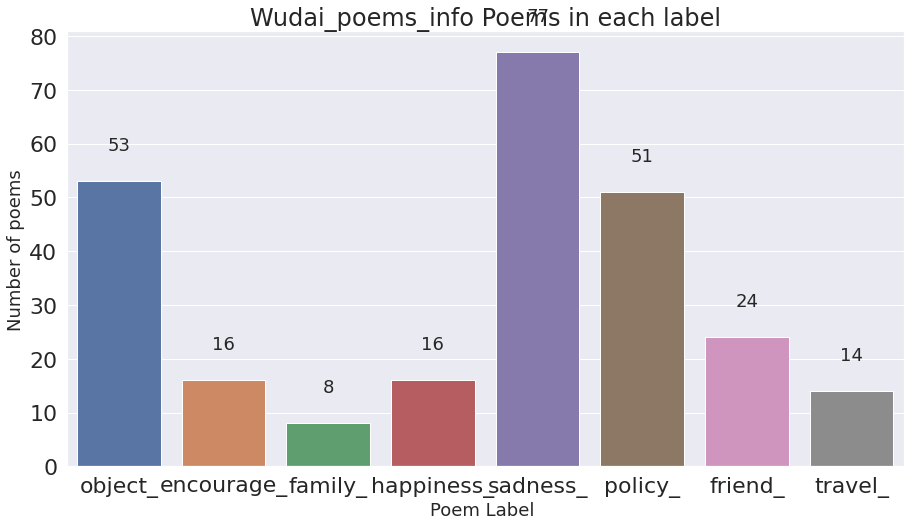

In [109]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
wudai_poems_info = poems_info[poems_info.dynasty=='五代']
wudai_labels = list(wudai_poems_info.columns.values)[4:]

ax= sns.barplot(wudai_labels, wudai_poems_info.iloc[:,4:].sum().values)

plt.title("Wudai_poems_info Poems in each label", fontsize=24)
plt.ylabel('Number of poems', fontsize=18)
plt.xlabel('Poem Label ', fontsize=18)

#adding the text labels
rects = ax.patches
wudai_labels = wudai_poems_info.iloc[:,4:].sum().values
for rect, label in zip(rects, wudai_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

/home/lindayang16/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


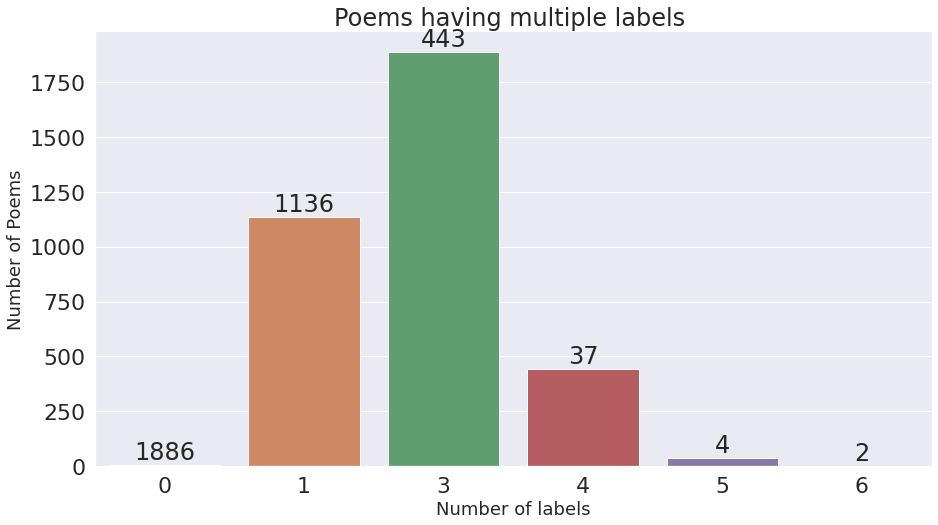

In [96]:
rowSums = poems_info.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Poems having multiple labels ")
plt.ylabel('Number of Poems', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [11]:
from wordcloud import WordCloud,STOPWORDS
#import libraries to handle classic chinese word
from jiayan import load_lm
from jiayan import CharHMMTokenizer


In [12]:
lm = load_lm('jiayan.klm')


In [27]:
frequent_single_word_string="之、而、为、其、者、也、有、于、若、与、如、何、子、此、且、若、无、焉、将、吾、吧、罢、呗、啵、的、价、家、啦、来、唻、了、嘞、哩、咧、咯、啰、喽、吗、嘛、嚜、么、麽、哪、呢、呐、否、呵、哈、不、兮、般、则、连、罗、给、噻、哉、呸、阿、啊、呃、欸、哇、呀、也、耶、哟、欤、呕、噢、呦、嘢"
frequent_dual_words_string="罢了、不成、得了、而已、的话、来着、了得、也罢、已而、着呢、着哩、着呐、来的、也好、便了、起见、就是、似地、是的、一般、一样、再说、不过"
c = set()
frequent_single_word_string_list = re.findall(r'[\u4e00-\u9fff]+', frequent_single_word_string)
frequent_single_word_string = "、".join(frequent_single_word_string_list)
frequent_dual_words_string_list = re.findall(r'[\u4e00-\u9fff]+', frequent_dual_words_string)
frequent_dual_words_string = "、".join(frequent_single_word_string_list)
for char in frequent_single_word_string.split('、'):
    if char not in frequent_char_set:
        frequent_char_set.add(char)

for char in frequent_dual_words_string.split('、'):
    if char not in frequent_char_set:
        frequent_char_set.add(char)

In [64]:
tokenizer = CharHMMTokenizer(lm)


def tokenize_poem(some_list, f):
    result = []
    for i, x in enumerate(some_list):
        chinese_chars = re.findall(r'[\u4e00-\u9fff]+', x)
        chinese_string = "".join(chinese_chars)
        result.append(f(chinese_string))
    return result
# tokenized_poems_info = tokenize_poem(poems_info['content'], lambda x: " ".join(list(tokenizer.tokenize(x))))


In [65]:
from wordcloud import WordCloud,STOPWORDS
# wc = WordCloud(font_path='msyh.ttf',
#                background_color="white",  # background color
#                max_words=50,  # Maximum number of words displayed in word cloud
#                max_font_size=100,  # Font maximum
#                random_state=42,
#                width=1000, height=860, margin=2,# Set the default size of the picture, but if the background picture is used, the saved picture size will be saved according to its size, and margin is the word edge distance
#                )

In [83]:
#['object_', 'encourage_', 'family_', 'happiness_', 'sadness_', 'policy_', 'friend_', 'travel_']
object_subset = poems_info[poems_info.object_==1]
object_text = " ".join(tokenize_poem(object_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
object_text2n_ = [chars for chars in object_text.split(" ") if len(chars) > 1]

encourage_subset = poems_info[poems_info.encourage_==1]
encourage_text = " ".join(tokenize_poem(encourage_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
encourage_text2n_ = [chars for chars in encourage_text.split(" ") if len(chars) > 1]

family_subset = poems_info[poems_info.family_==1]
family_text = " ".join(tokenize_poem(family_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
family_text2n_ = [chars for chars in family_text.split(" ") if len(chars) > 1]

happiness_subset = poems_info[poems_info.happiness_==1]
happiness_text = " ".join(tokenize_poem(happiness_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
happiness_text2n_ = [chars for chars in happiness_text.split(" ") if len(chars) > 1]

sadness_subset = poems_info[poems_info.sadness_==1]
sadness_text = " ".join(tokenize_poem(sadness_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
sadness_text2n_ = [chars for chars in sadness_text.split(" ") if len(chars) > 1]

policy_subset = poems_info[poems_info.policy_==1]
policy_text = " ".join(tokenize_poem(policy_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
policy_text2n_ = [chars for chars in policy_text.split(" ") if len(chars) > 1]

friend_subset = poems_info[poems_info.friend_==1]
friend_text = " ".join(tokenize_poem(friend_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
friend_text2n_ = [chars for chars in friend_text.split(" ") if len(chars) > 1]

travel_subset = poems_info[poems_info.travel_==1]
travel_text = " ".join(tokenize_poem(travel_subset['content'], lambda x: " ".join(list(tokenizer.tokenize(x)))))
travel_text2n_ = [chars for chars in travel_text.split(" ") if len(chars) > 1]


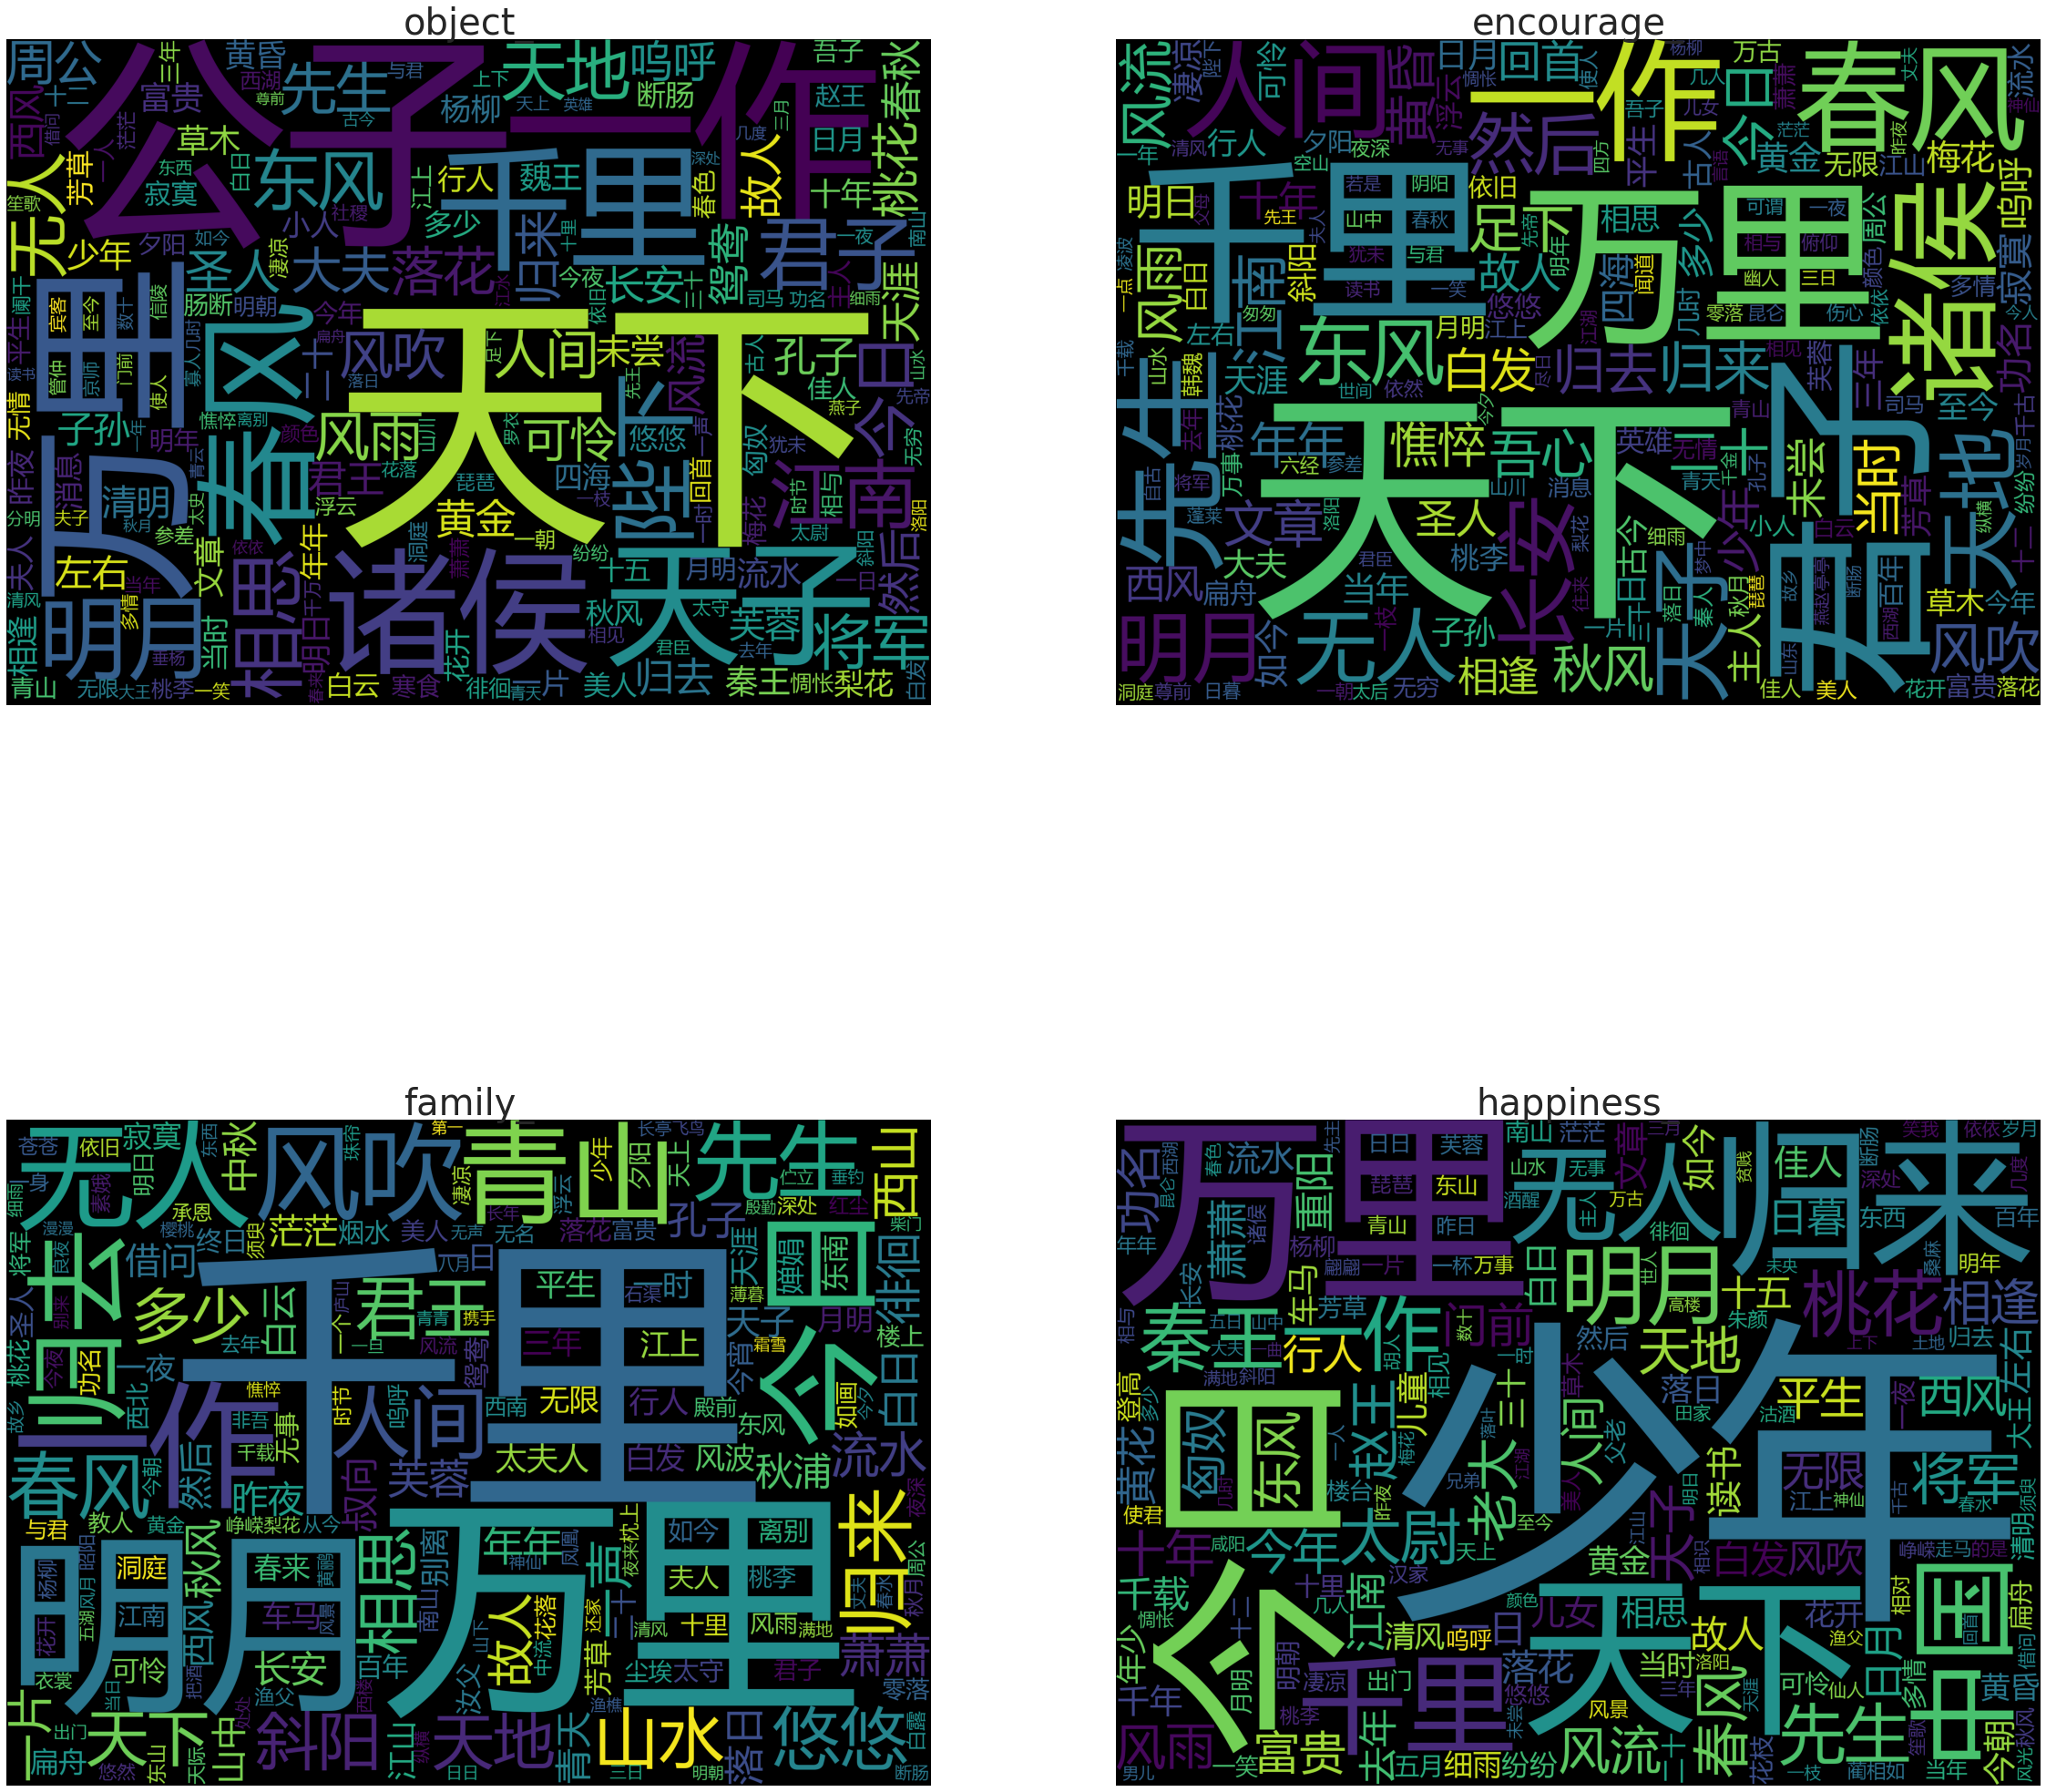

In [84]:
#['object_', 'encourage_', 'family_', 'happiness_', 'sadness_', 'policy_', 'friend_', 'travel_']
plt.figure(figsize=(40,40))

# object_
cloud_object_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(object_text2n_))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("object_",fontsize=40)
plt.imshow(cloud_object_)


# encourage_
cloud_encourage_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(encourage_text2n_))
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title("encourage_",fontsize=40)
plt.imshow(cloud_encourage_)


# family_
cloud_family_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(family_text2n_))

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title("family_",fontsize=40)
plt.imshow(cloud_family_)

# happiness_
cloud_happiness_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(happiness_text2n_))


plt.subplot(2, 2, 4)
plt.axis('off')
plt.title("happiness_",fontsize=40)
plt.imshow(cloud_happiness_)


plt.show()

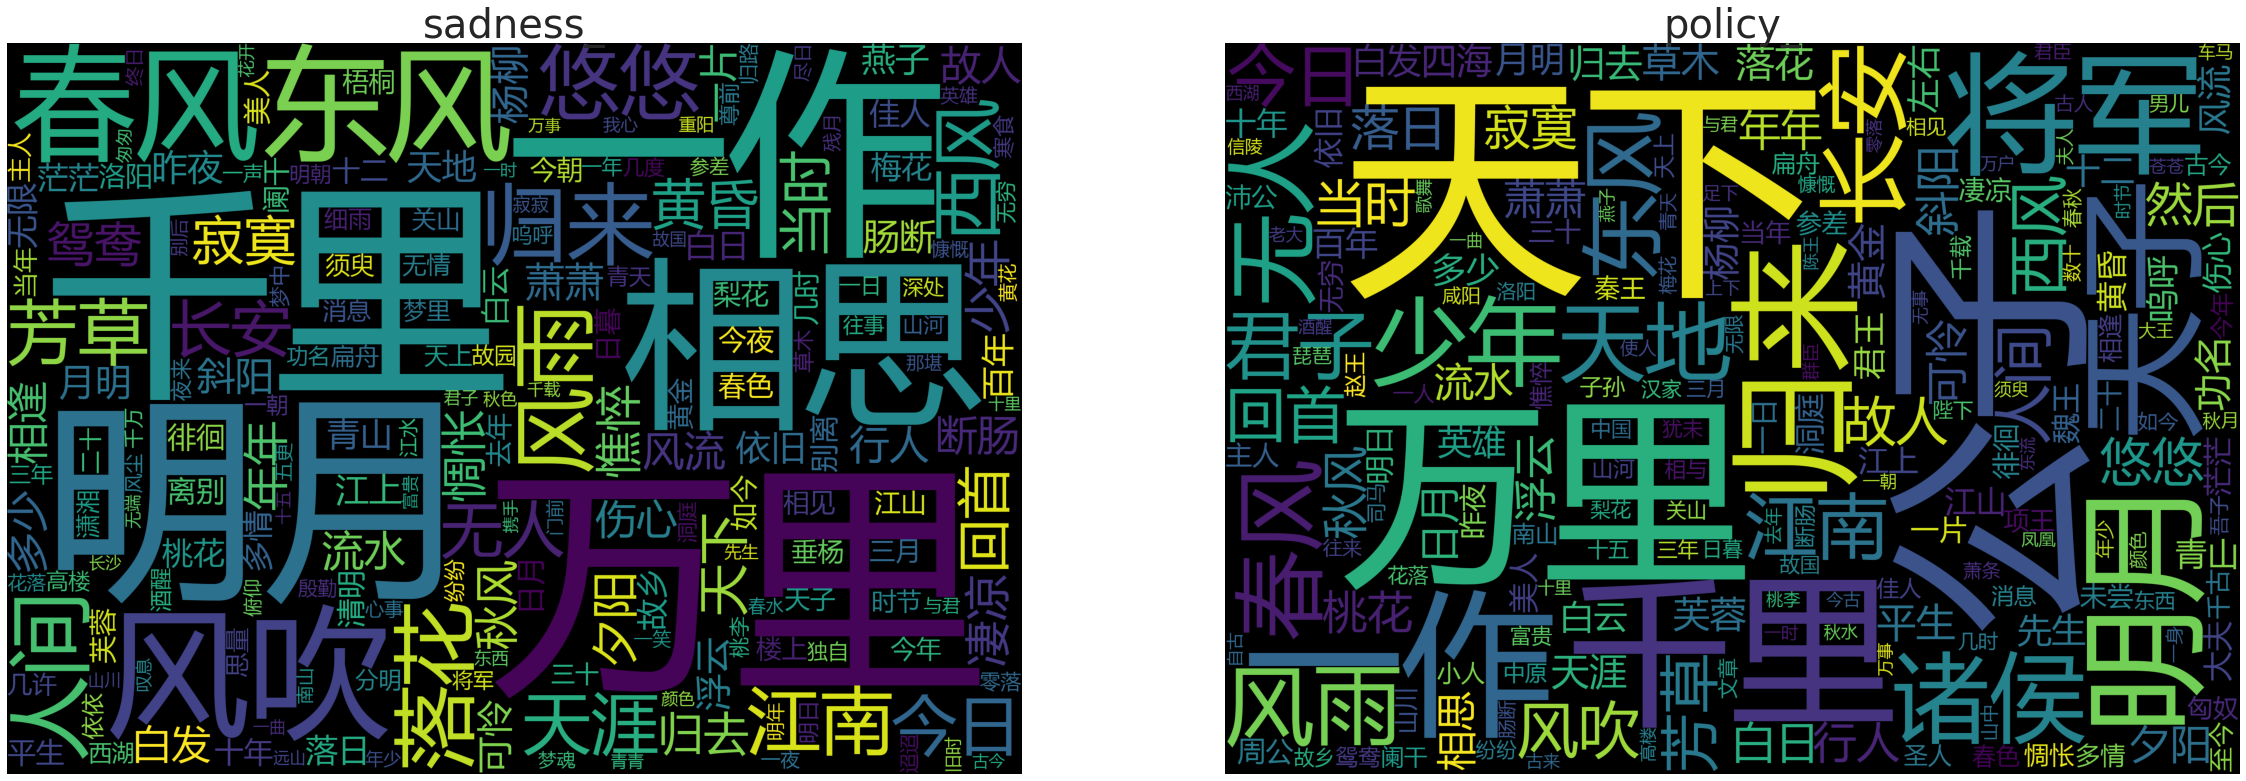

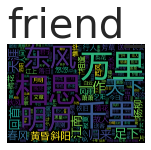

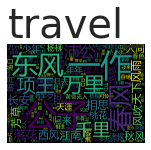

In [85]:
plt.figure(figsize=(40,40))
# sadness_
cloud_sadness_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(sadness_text2n_))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("sadness_",fontsize=40)
plt.imshow(cloud_sadness_)

# policy_
cloud_policy_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(policy_text2n_))

plt.subplot(2, 2, 2)
plt.axis('off')
plt.title("policy_",fontsize=40)
plt.imshow(cloud_policy_)

plt.show()


# friend_
cloud_friend_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(friend_text2n_))

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title("friend_",fontsize=40)
plt.imshow(cloud_friend_)

plt.show()

# travel_
cloud_travel_ = WordCloud(
                          font_path='msyh.ttf',
                          stopwords=frequent_char_set,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(travel_text2n_))

plt.subplot(2, 2, 4)
plt.axis('off')
plt.title("travel_",fontsize=40)
plt.imshow(cloud_travel_)

plt.show()